In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import warnings

warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Preprocessing

In [36]:
# Load data
df = pd.read_csv("train.csv")

In [37]:
# Data Overview and Null Check
print("Dataset Overview:")
display(df.head())
print("\nNull Values in Each Column:")
display(df.isnull().sum())

Dataset Overview:


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,Yes,No,Business,No,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,No,Yes,Education,No,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,No,No,Other,Yes,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,No,Yes,Education,Yes,0



Null Values in Each Column:


LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [38]:
# Drop unnecessary columns
df.drop(columns=["LoanID", "LoanTerm"], inplace=True)

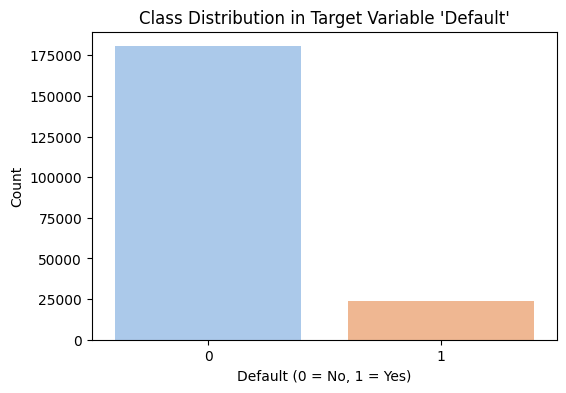

In [39]:
# Plot target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Default', data=df, palette='pastel')
plt.title("Class Distribution in Target Variable 'Default'")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [40]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,18,137576,209136,846,26,2,10.47,0.81,1,2,2,1,0,1,0,0
1,47,57194,5970,748,30,2,19.72,0.73,1,3,0,0,1,2,0,0
2,26,84328,95065,453,7,2,24.25,0.45,2,2,1,0,0,4,1,0
3,53,49795,229582,533,107,3,14.44,0.17,0,2,2,1,0,0,1,1
4,49,115450,22072,840,0,4,24.48,0.11,0,1,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,40,116623,161673,651,79,2,23.44,0.87,0,1,0,0,0,3,1,0
204273,67,62958,189499,460,77,3,9.29,0.11,0,2,2,0,0,1,1,0
204274,62,34372,59645,524,94,3,9.72,0.24,3,0,2,1,0,0,0,0
204275,44,146262,198454,489,7,4,4.31,0.30,1,2,1,1,0,3,0,0


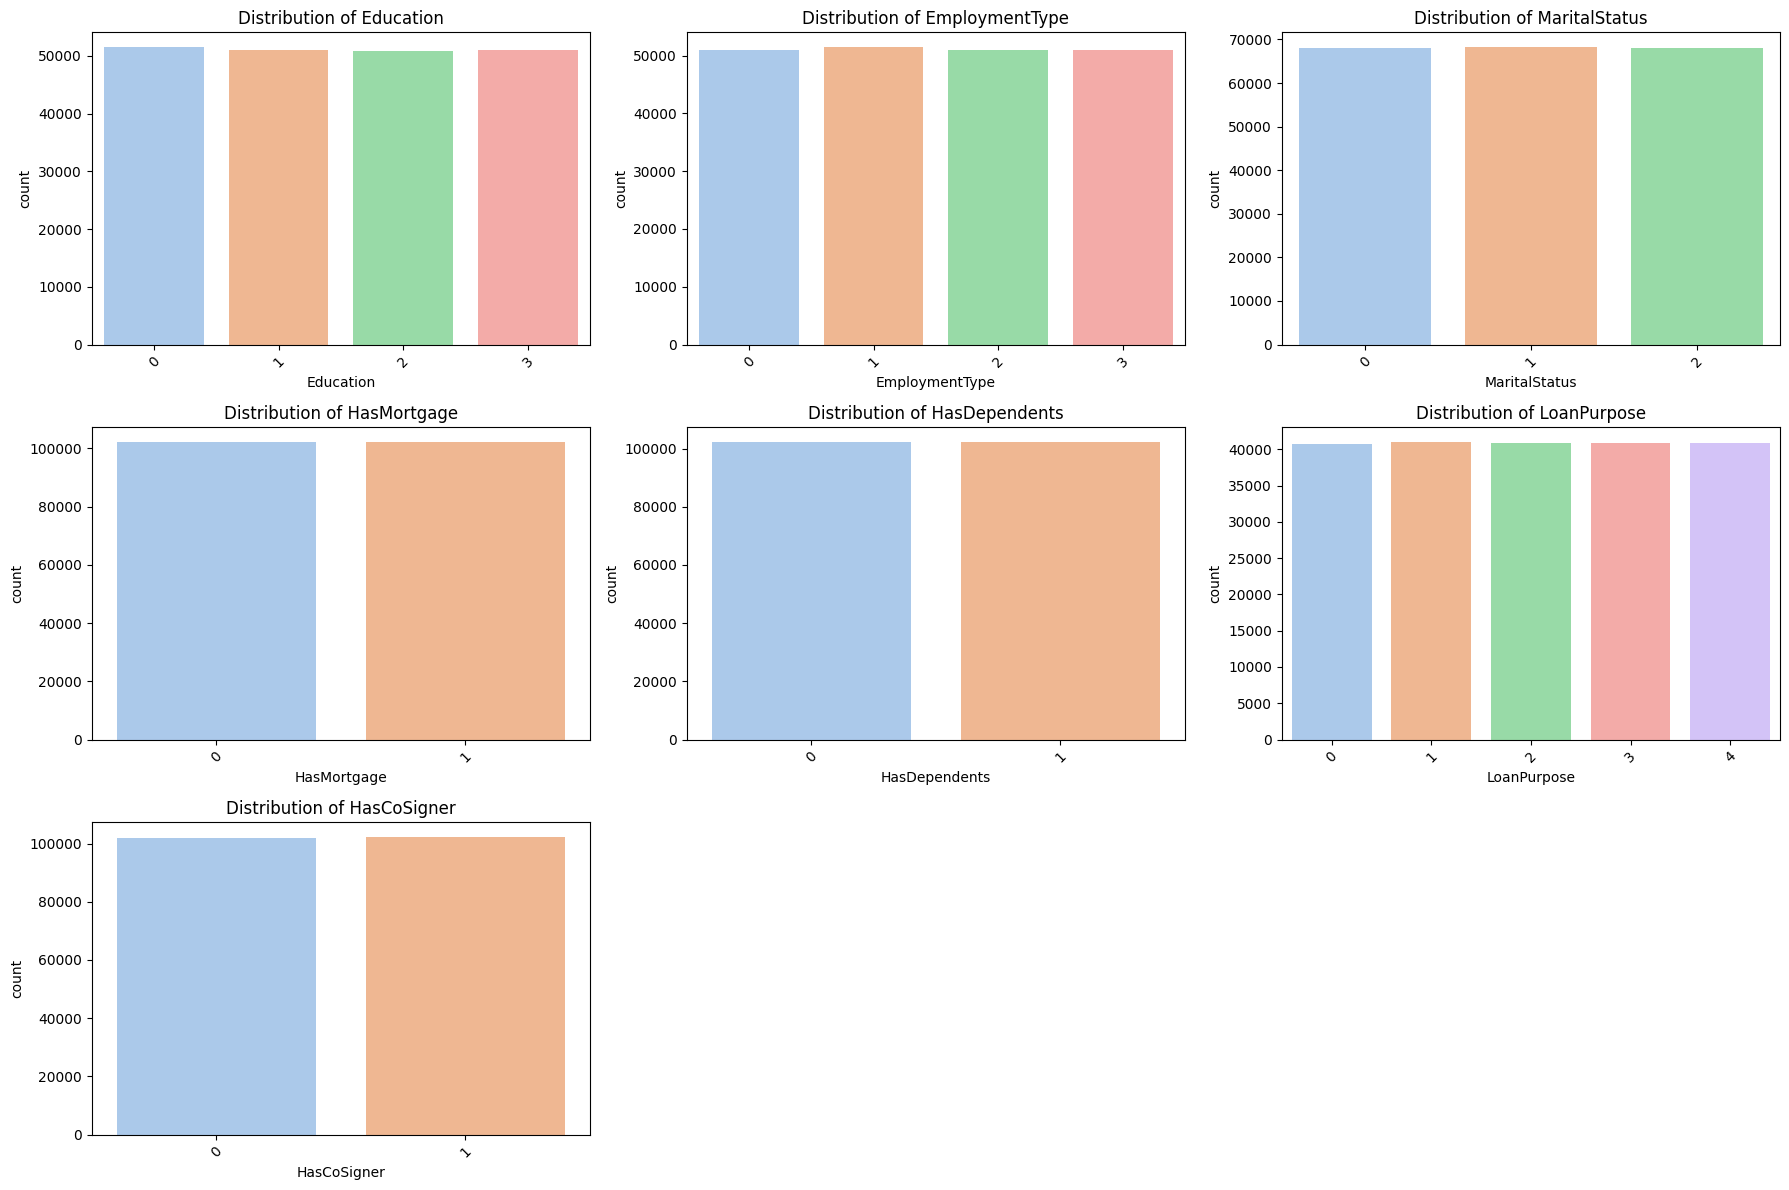

In [41]:
# Visualize categorical columns
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

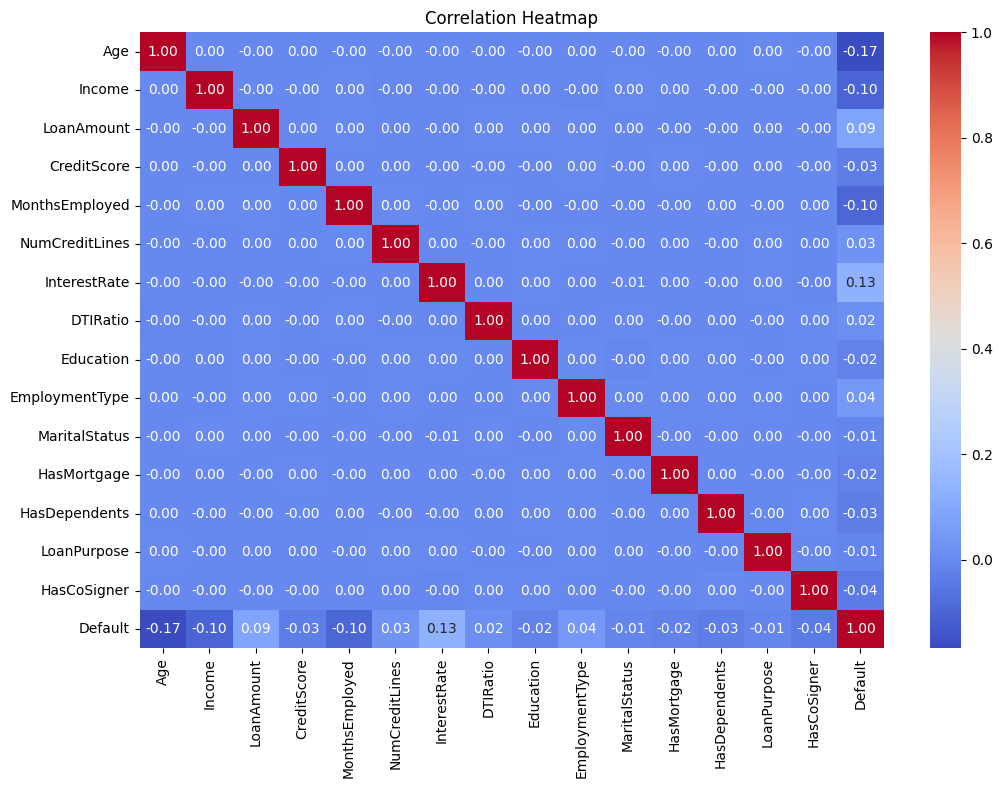

In [42]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

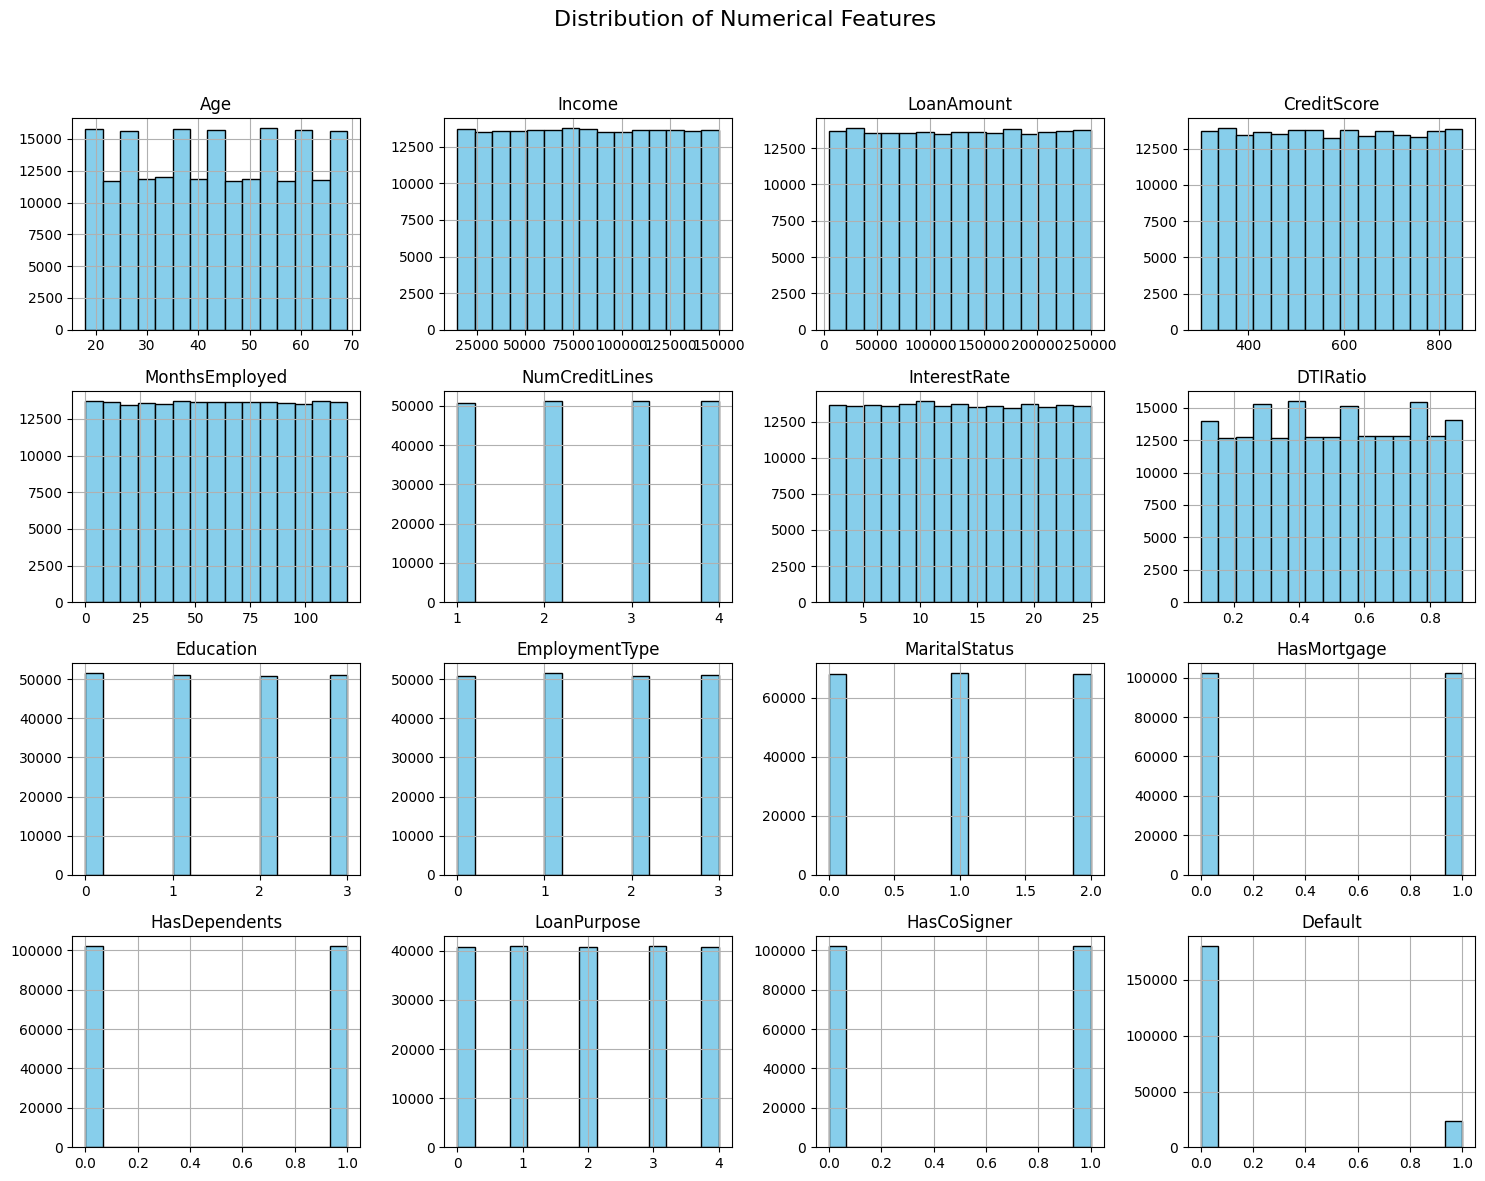

In [43]:
# Distribution of numeric features
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_columns].hist(bins=15, figsize=(15, 12), layout=(4, 4), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

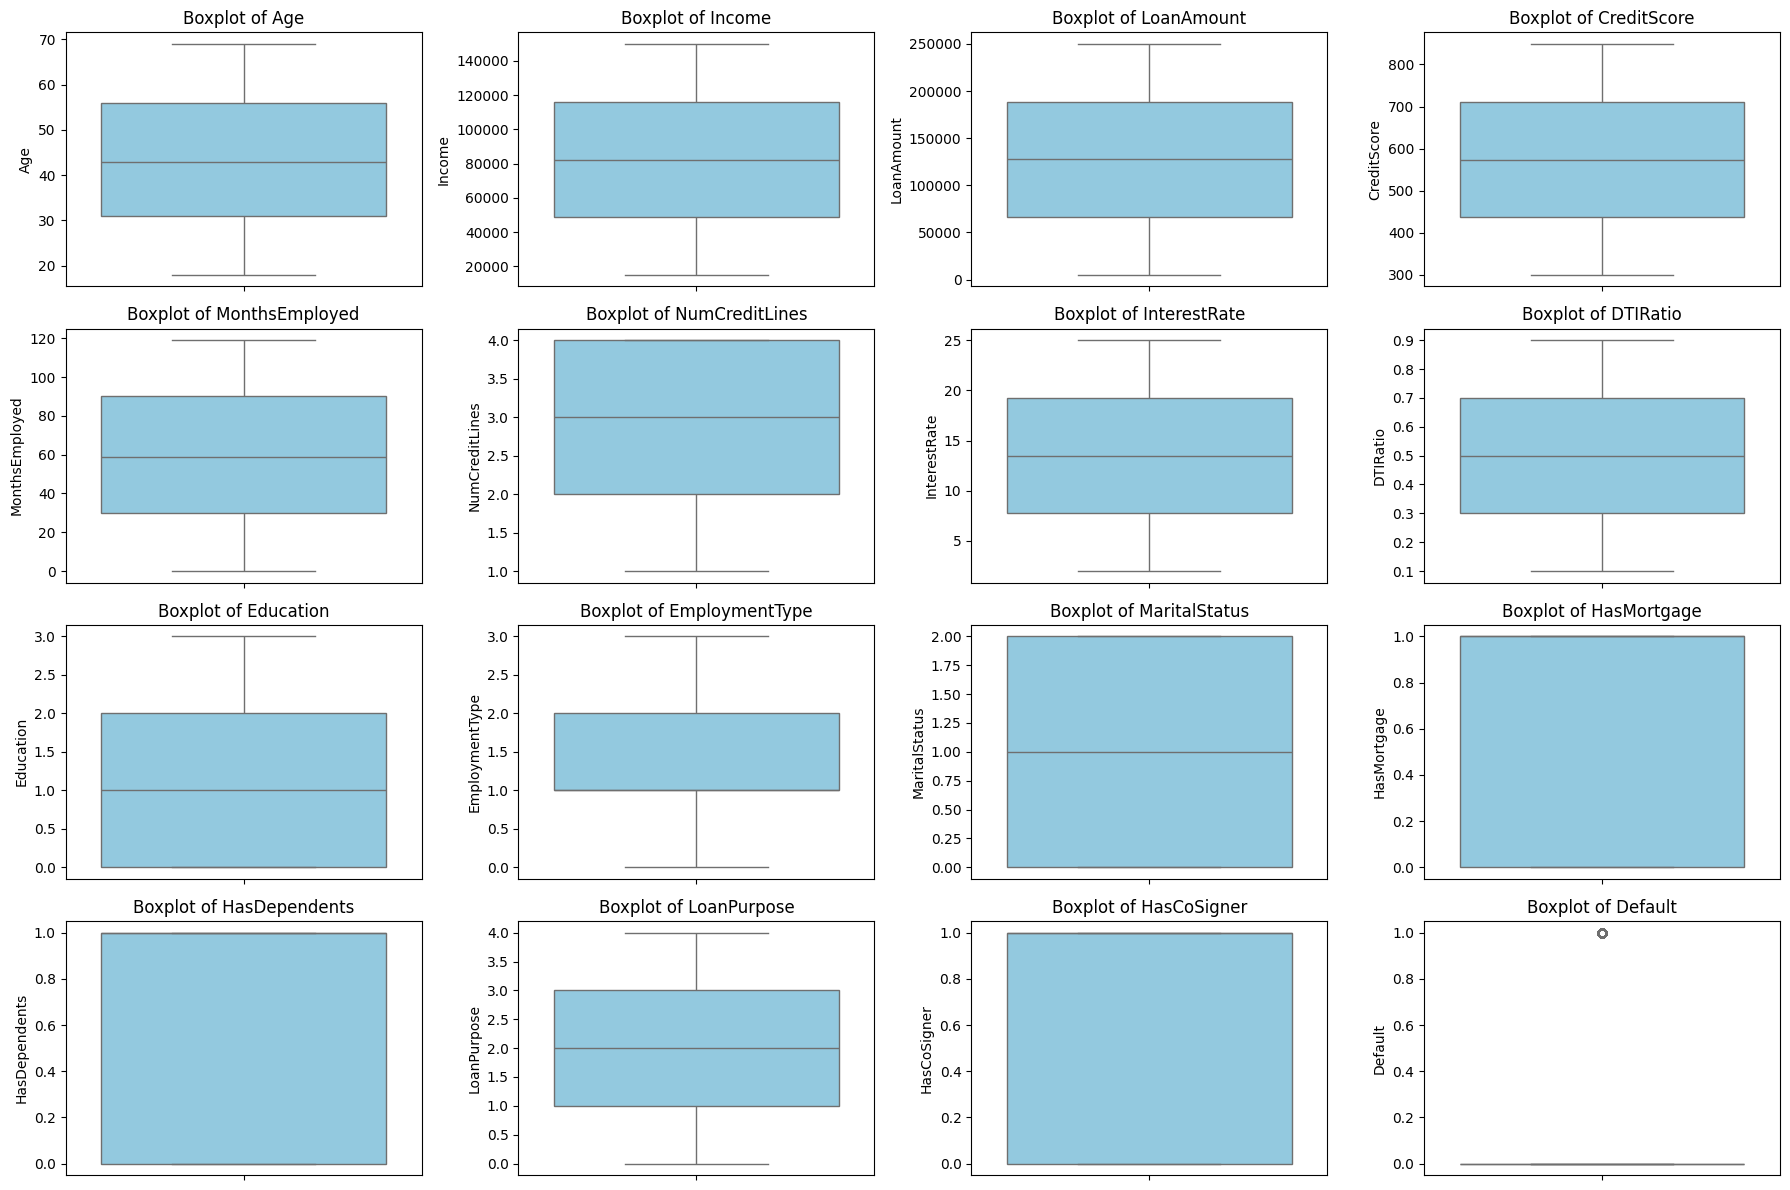

In [44]:
# Box plot for numerical columns
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [45]:
correlation=df.corr()
correlation['Default'].sort_values(ascending=False)

Default           1.000000
InterestRate      0.129885
LoanAmount        0.085519
EmploymentType    0.042670
NumCreditLines    0.028565
DTIRatio          0.018595
MaritalStatus    -0.008441
LoanPurpose      -0.010799
HasMortgage      -0.021174
Education        -0.021508
CreditScore      -0.034128
HasDependents    -0.034737
HasCoSigner      -0.040688
MonthsEmployed   -0.095429
Income           -0.100515
Age              -0.167484
Name: Default, dtype: float64

In [46]:
# Normalize data
min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(df)
df=pd.DataFrame(normalized_data, columns=df.columns)
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,0.000000,0.907977,0.833211,0.994536,0.218487,0.333333,0.368261,0.8875,0.333333,0.666667,1.0,1.0,0.0,0.25,0.0,0.0
1,0.568627,0.312550,0.003955,0.816029,0.252101,0.333333,0.770435,0.7875,0.333333,1.000000,0.0,0.0,1.0,0.50,0.0,0.0
2,0.156863,0.513545,0.367611,0.278689,0.058824,0.333333,0.967391,0.4375,0.666667,0.666667,0.5,0.0,0.0,1.00,1.0,0.0
3,0.686275,0.257743,0.916665,0.424408,0.899160,0.666667,0.540870,0.0875,0.000000,0.666667,1.0,1.0,0.0,0.00,1.0,1.0
4,0.607843,0.744080,0.069678,0.983607,0.000000,1.000000,0.977391,0.0125,0.000000,0.333333,1.0,0.0,1.0,0.50,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,0.431373,0.752769,0.639483,0.639344,0.663866,0.333333,0.932174,0.9625,0.000000,0.333333,0.0,0.0,0.0,0.75,1.0,0.0
204273,0.960784,0.355247,0.753059,0.291439,0.647059,0.666667,0.316957,0.0125,0.000000,0.666667,1.0,0.0,0.0,0.25,1.0,0.0
204274,0.862745,0.143497,0.223039,0.408015,0.789916,0.666667,0.335652,0.1750,1.000000,0.000000,1.0,1.0,0.0,0.00,0.0,0.0
204275,0.509804,0.972318,0.789611,0.344262,0.058824,1.000000,0.100435,0.2500,0.333333,0.666667,0.5,1.0,0.0,0.75,0.0,0.0


In [47]:
# Target and features split
X = df.drop('Default', axis=1)
y = df['Default']

In [48]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle imbalance using SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

X_train

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
137918,0.529412,0.429099,0.074494,0.393443,0.605042,0.000000,0.979565,0.8625,0.333333,1.000000,0.5,1.0,0.0,0.50,1.0
32623,0.450980,0.373610,0.044792,0.051002,0.680672,1.000000,0.739130,0.7375,0.333333,1.000000,0.0,0.0,0.0,0.75,0.0
20894,0.313725,0.978400,0.279455,0.559199,0.563025,0.000000,0.269565,0.7000,0.666667,0.000000,1.0,0.0,1.0,0.25,1.0
116646,0.137255,0.611812,0.655344,0.344262,0.966387,1.000000,0.831304,0.1375,0.666667,0.000000,1.0,0.0,1.0,1.00,0.0
3325,0.078431,0.951229,0.783831,0.225865,0.126050,0.666667,0.471304,0.6375,0.666667,0.666667,0.0,1.0,1.0,0.25,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.745098,0.598012,0.300198,0.510018,0.445378,0.333333,0.495217,0.5500,0.000000,0.333333,0.0,0.0,0.0,1.00,1.0
103694,0.274510,0.232668,0.091878,0.908925,0.478992,1.000000,0.530435,0.3875,0.666667,1.000000,0.5,1.0,1.0,0.00,1.0
131932,0.705882,0.945214,0.703740,0.398907,0.168067,0.666667,0.377826,0.4625,1.000000,0.666667,0.5,0.0,0.0,0.75,0.0
146867,0.627451,0.628345,0.640764,0.570128,0.512605,0.666667,0.448261,0.5750,0.333333,0.666667,0.0,0.0,1.0,1.00,1.0


## Decision Tree

In [28]:
# Model Training and Evaluation: Decision Tree with GridSearchCV
print("\nDecision Tree Classifier with Grid Search")

d_tree=DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(estimator=d_tree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [29]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


Process LokyProcess-2:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/ayusharyakashyap/Library/Python/3.11/lib/python/site-packages/joblib/externals/loky/process_executor.py", line 478, in _process_worker
    _process_reference_size = _get_memory_usage(pid, force_gc=True)
                              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ayusharyakashyap/Library/Python/3.11/lib/python/site-packages/joblib/externals/loky/process_executor.py", line 109, in _get_memory_usage
    gc.collect()
KeyboardInterrupt
Process LokyProcess-7:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/process.py", 

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   1.7s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   1.7s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   1.7s


KeyboardInterrupt: 

In [ ]:
# Feature Importance from Decision Tree
plt.figure(figsize=(10, 6))
importance = best_dtree_model.feature_importances_
sns.barplot(x=importance, y=X.columns, palette='viridis')
plt.title("Feature Importances from Decision Tree")
plt.show()

In [ ]:
# Evaluate Decision Tree
best_model=grid_search.best_estimator_
y_pred=best_model.predict(X_test)
acc=accuracy_score(y_test, y_pred)
acc

## Random Forest

In [ ]:
# Model Training and Evaluation: Random Forest
print("\nRandom Forest Classifier")
model_RF = RandomForestClassifier(
    n_estimators=100,        
    max_depth=50,            
    min_samples_split=5,     
    min_samples_leaf=1,          
    bootstrap=True,          
    random_state=42,         
)


model_RF.fit(X_train, y_train)
y_pred= model_RF.predict(X_test)
acc=accuracy_score(y_test, y_pred)
acc

In [ ]:
# Feature Importance from Random Forest
plt.figure(figsize=(10, 6))
importance_rf = model_RF.feature_importances_
sns.barplot(x=importance_rf, y=X.columns, palette='cool')
plt.title("Feature Importances from Random Forest")
plt.show()

## Xgboost

In [49]:
# Model Training and Evaluation: Gradient Boosting Classifier
print("\nGradient Boosting Classifier")

gb_model = GradientBoostingClassifier(random_state=42,
    n_estimators=150,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=3,
    min_samples_leaf=3,
    subsample=0.8,
    max_features='sqrt')
gb_model.fit(X_train, y_train)

gb_predictions = gb_model.predict(X_test)

acc=accuracy_score(y_test, gb_predictions)
acc


Gradient Boosting Classifier


0.8850107695320149

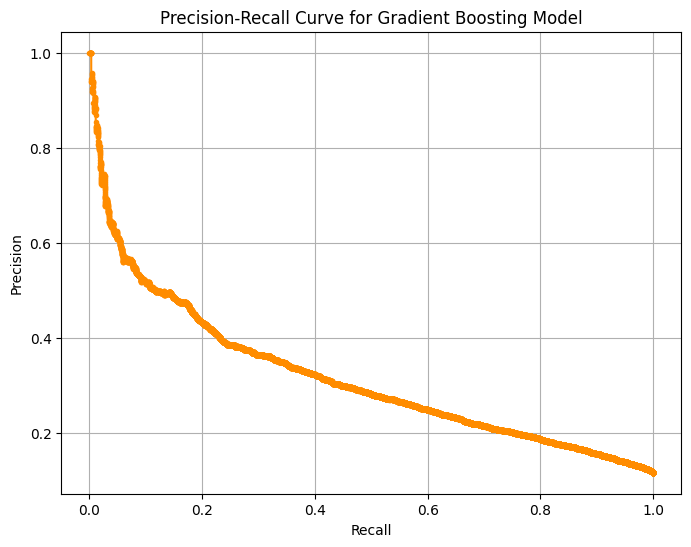

In [50]:
from sklearn.metrics import precision_recall_curve

# Predict probabilities for Precision-Recall curve
y_scores = gb_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='darkorange')
plt.title("Precision-Recall Curve for Gradient Boosting Model")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

In [51]:
# Load and preprocess test data for final prediction

test_data = pd.read_csv('test.csv')
Loan = test_data['LoanID'].copy() 
test_data.drop(columns="LoanID", inplace=True)
test_data.drop(columns="LoanTerm", inplace=True)
test_data

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,55,112656,92393,581,113,2,23.54,0.15,PhD,Self-employed,Single,Yes,Yes,Home,No
1,56,91569,131575,641,54,1,15.19,0.43,High School,Part-time,Divorced,Yes,Yes,Education,Yes
2,26,78169,75417,569,105,3,18.02,0.29,Master's,Part-time,Married,Yes,Yes,Education,Yes
3,26,63033,10804,326,118,1,14.71,0.41,High School,Part-time,Single,No,No,Business,Yes
4,24,29665,21182,662,102,3,15.02,0.69,PhD,Unemployed,Single,No,Yes,Business,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51065,51,99473,170353,628,24,1,17.03,0.46,PhD,Self-employed,Divorced,Yes,Yes,Auto,Yes
51066,29,42016,111314,371,51,4,7.10,0.50,PhD,Self-employed,Married,No,No,Other,No
51067,67,88507,142666,731,51,1,22.89,0.79,Bachelor's,Part-time,Divorced,No,No,Education,No
51068,42,116649,190938,488,6,1,10.83,0.32,Bachelor's,Full-time,Married,No,Yes,Other,Yes


In [52]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
label_encoder = LabelEncoder()

for col in categorical_columns:
    test_data[col] = label_encoder.fit_transform(test_data[col])

In [53]:
# Normalizing the test data

min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform( test_data)
test_data=pd.DataFrame(normalized_data, columns= test_data.columns)
test_data

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,0.725490,0.723410,0.356727,0.511840,0.949580,0.333333,0.936522,0.0625,1.000000,0.666667,1.0,1.0,1.0,0.75,0.0
1,0.745098,0.567203,0.516662,0.621129,0.453782,0.000000,0.573478,0.4125,0.333333,0.333333,0.0,1.0,1.0,0.50,1.0
2,0.156863,0.467939,0.287433,0.489982,0.882353,0.666667,0.696522,0.2375,0.666667,0.333333,0.5,1.0,1.0,0.50,1.0
3,0.156863,0.355816,0.023691,0.047359,0.991597,0.000000,0.552609,0.3875,0.333333,0.333333,1.0,0.0,0.0,0.25,1.0
4,0.117647,0.108634,0.066053,0.659381,0.857143,0.666667,0.566087,0.7375,1.000000,1.000000,1.0,0.0,1.0,0.25,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51065,0.647059,0.625754,0.674949,0.597450,0.201681,0.000000,0.653478,0.4500,1.000000,0.666667,0.0,1.0,1.0,0.00,1.0
51066,0.215686,0.200127,0.433959,0.129326,0.428571,1.000000,0.221739,0.5000,1.000000,0.666667,0.5,0.0,0.0,1.00,0.0
51067,0.960784,0.544520,0.561934,0.785064,0.428571,0.000000,0.908261,0.8625,0.000000,0.333333,0.0,0.0,0.0,0.50,0.0
51068,0.470588,0.752989,0.758974,0.342441,0.050420,0.000000,0.383913,0.2750,0.000000,0.000000,0.5,0.0,1.0,1.00,1.0


In [54]:
# Final predictions using Gradient Boosting model
XTest = test_data
predictions=gb_model.predict(XTest)

In [55]:
output = pd.DataFrame({
    'LoanID': Loan,'Default': predictions
})

output.to_csv('final_submission_xgboost.csv', index=False)